In [10]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [11]:
nsamples = 1000
val_ratio = 0.2
test_ratio = 0.2 
tflite_model_name = "sine_wave_generator"
c_model_name = "sine_wave_generator"

(1000,)

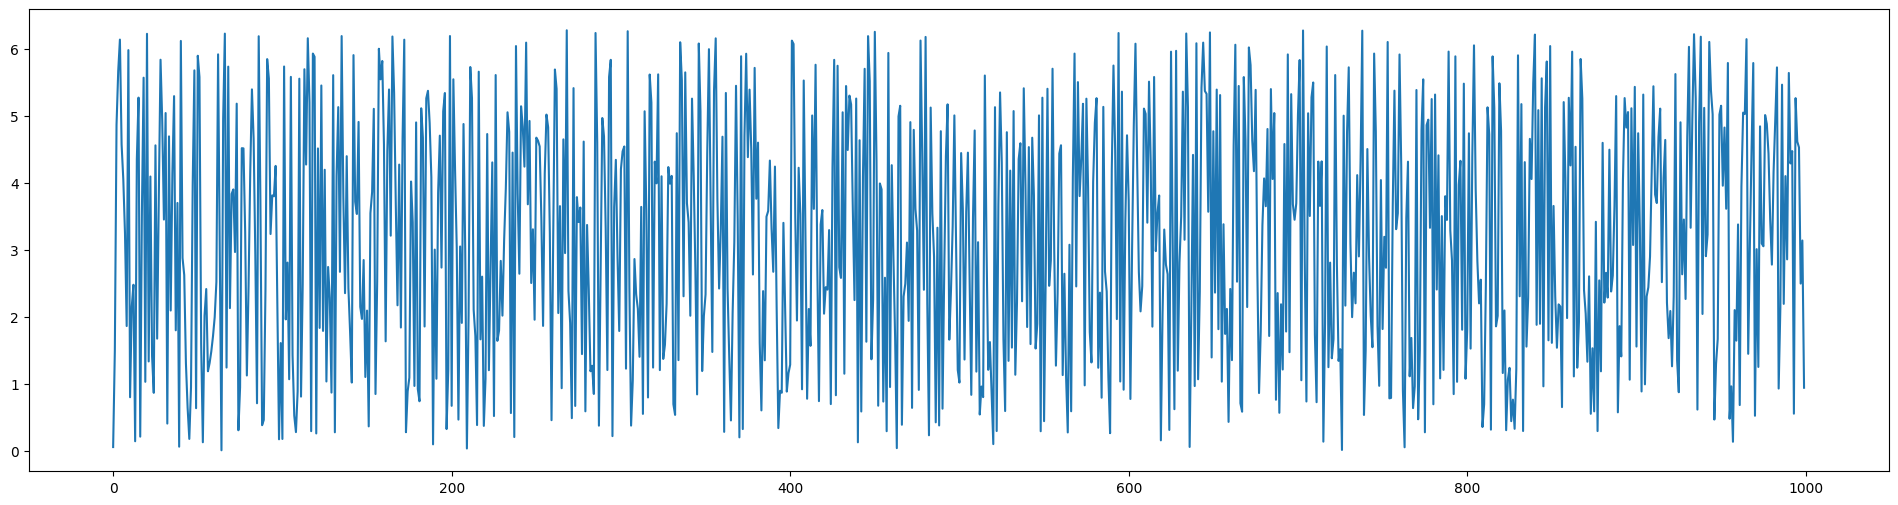

In [12]:
np.random.seed(3124)
x_values = np.random.uniform(low=0, high=2*math.pi, size=nsamples)
plt.figure(figsize=(24, 6))
plt.plot(x_values)
x_values.shape

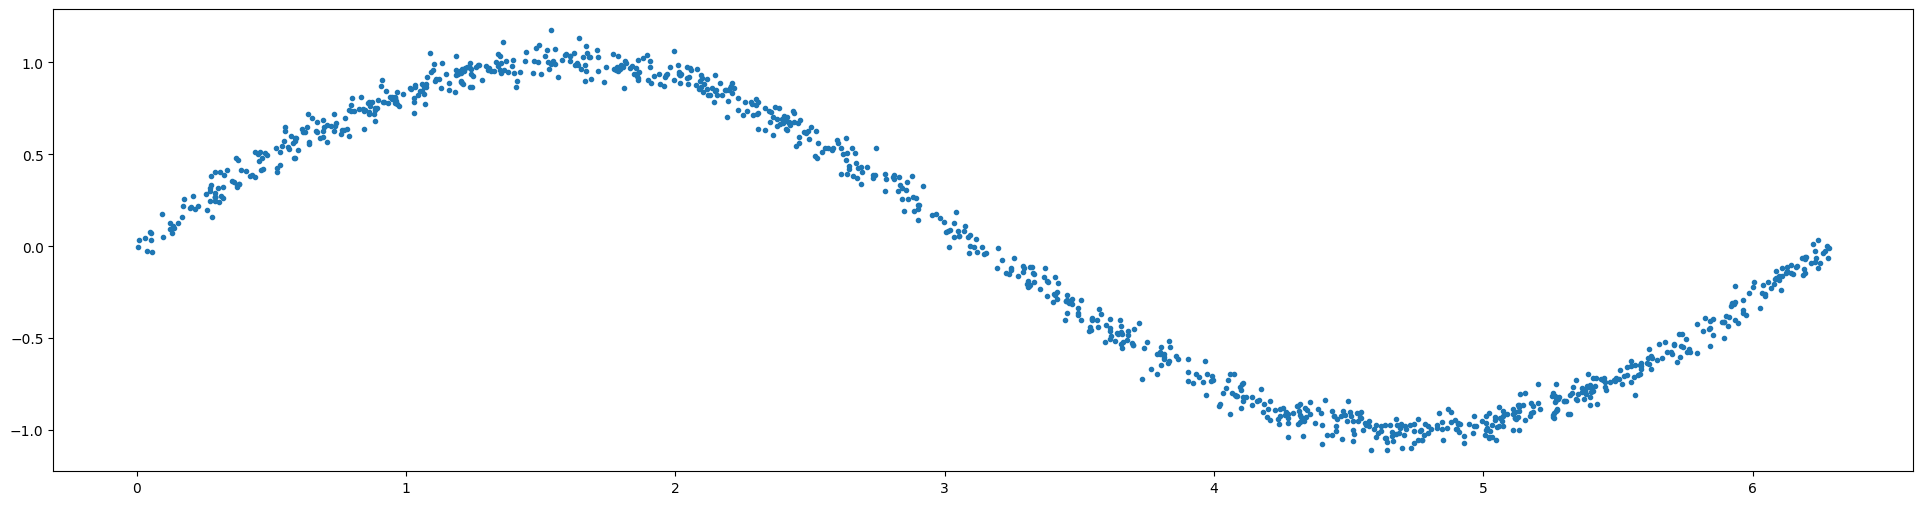

In [13]:
y_values = np.sin(x_values) + (0.05 * np.random.randn(x_values.shape[0]))
plt.figure(figsize=(24, 6))
plt.plot(x_values, y_values, '.')

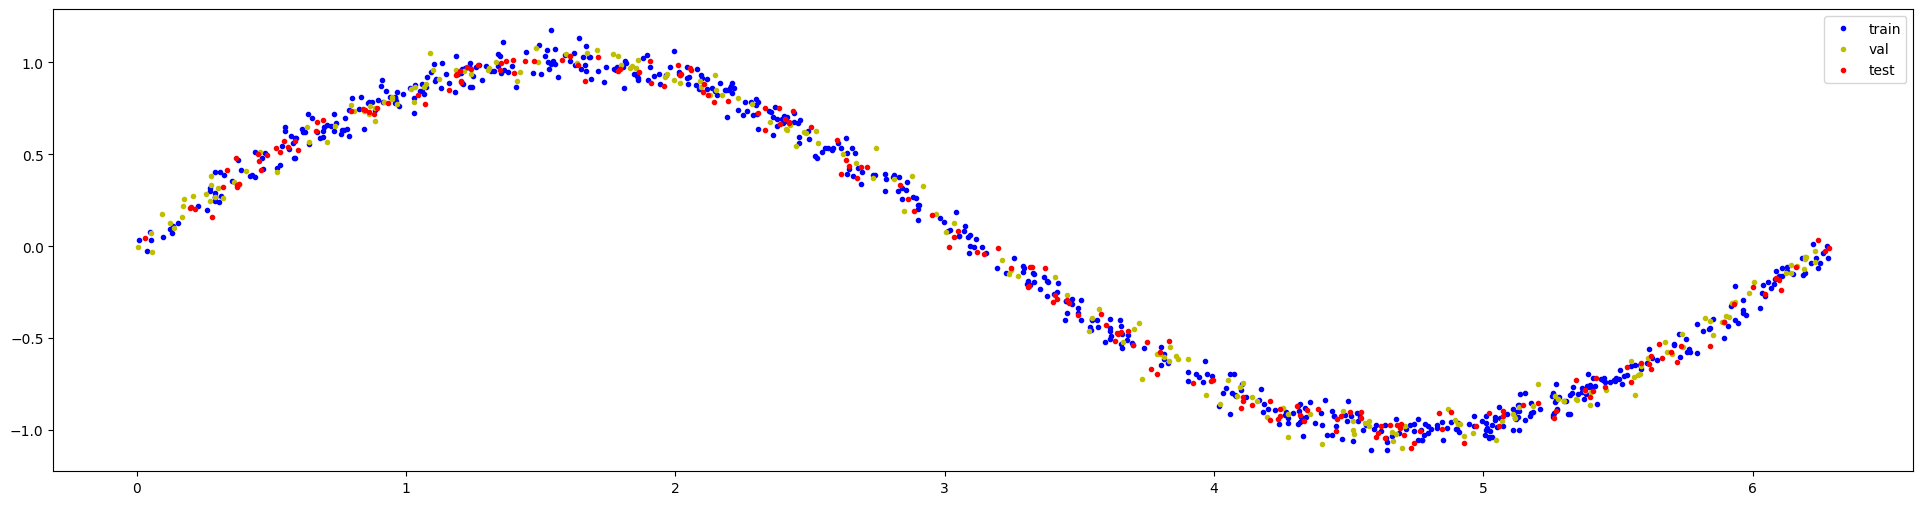

In [14]:
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

assert (x_train.size + x_val.size + x_test.size) == nsamples

plt.figure(figsize=(24, 6))
plt.plot(x_train, y_train, 'b.', label="train")
plt.plot(x_val, y_val, 'y.', label="val")
plt.plot(x_test, y_test, 'r.', label="test")
plt.legend()
plt.show()

In [15]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [18]:
history = model.fit(x_train, 
                    y_train,
                    epochs=1000, 
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/1000
6/6 [==============================] - 0s 18ms/step - loss: 1.0388 - mae: 0.9092 - val_loss: 0.7319 - val_mae: 0.7160
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.6310 - mae: 0.6511 - val_loss: 0.5101 - val_mae: 0.5732
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4756 - mae: 0.5594 - val_loss: 0.4137 - val_mae: 0.5286
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4138 - mae: 0.5427 - val_loss: 0.3778 - val_mae: 0.5180
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3910 - mae: 0.5407 - val_loss: 0.3629 - val_mae: 0.5138
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3794 - mae: 0.5381 - val_loss: 0.3530 - val_mae: 0.5093
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3691 - mae: 0.5319 - val_loss: 0.3430 - val_mae: 0.5038
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3585 - mae: 0.5

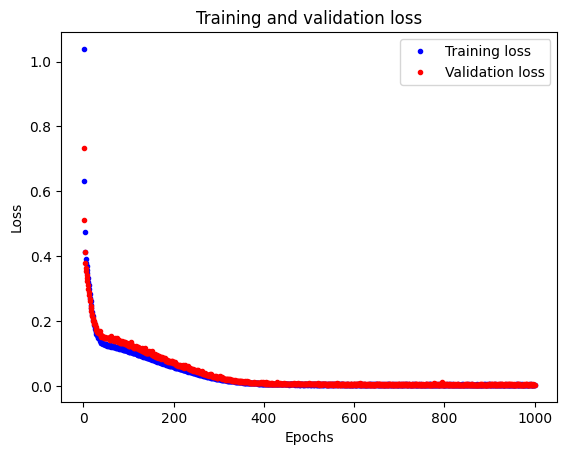

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b.', label='Training loss')
plt.plot(epochs, val_loss, 'r.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


<Figure size 640x480 with 0 Axes>

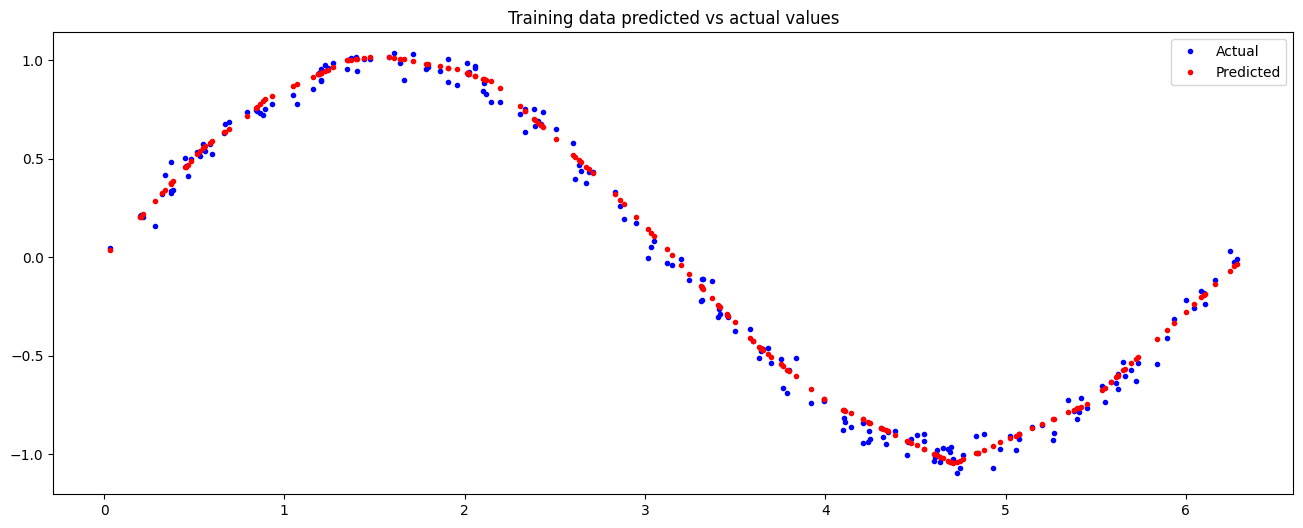

In [20]:
predicitions = model.predict(x_test)
plt.clf()
plt.figure(figsize=(16, 6))

plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predicitions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

with open(tflite_model_name + ".tflite" , 'wb') as file:
    file.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp0ez1ggqu/assets


INFO:tensorflow:Assets written to: /tmp/tmp0ez1ggqu/assets
2023-12-07 10:50:22.371875: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-12-07 10:50:22.371912: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-12-07 10:50:22.372440: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp0ez1ggqu
2023-12-07 10:50:22.373084: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-12-07 10:50:22.373102: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp0ez1ggqu
2023-12-07 10:50:22.374318: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2023-12-07 10:50:22.374923: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-12-07 10:50:22.404558: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio

In [22]:
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [23]:

# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))